# Computer game analysis for the online shop

<a id='d'></a>
## Description 

We have historical data on game sales, user and expert evaluations, genres and platforms (e.g. Xbox or PlayStation). We need to identify the patterns that determine a game's success. This will allow us to bet on a potentially popular product and plan advertising campaigns.
We have the data in front of us up to 2016. Suppose it is December 2016 and we are planning a campaign for 2017.

**Data description:**
 - Name - name of the game
 - Platform - platform
 - Year_of_Release - Year
 - Genre - Game genre
 - NA_sales - North American sales (millions of copies sold)
 - EU_sales - European sales (millions of copies sold)
 - JP_sales - sales in Japan (millions of copies sold)
 - Other_sales - sales in other countries (millions of copies sold)
 - Critic_Score - scores from critics (max. 100)
 - User_Score - user rating (maximum 10)
 - Rating - A rating from the ESRB (Entertainment Software Rating Board). 

This association determines the rating of computer games and assigns them an appropriate age category.
Data for 2016 may not be complete.

## General information about the dataset

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

In [3]:
df = pd.read_csv('/datasets/games.csv')
df.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [6]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

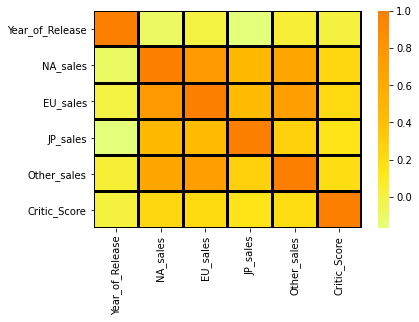

In [7]:
df_correlations = df.corr(method = 'pearson')
sns.heatmap(df_correlations, cmap='Wistia', linecolor='black', linewidths=2);

In [8]:
df[df.duplicated()].sum()

Name               0.0
Platform           0.0
Year_of_Release    0.0
Genre              0.0
NA_sales           0.0
EU_sales           0.0
JP_sales           0.0
Other_sales        0.0
Critic_Score       0.0
User_Score         0.0
Rating             0.0
dtype: float64

Table with released video games from 1980 to 2016, platforms and sales on different continents. 
    
The table has a total of 16715 rows and 11 columns, with most of the gaps in critics, viewers and game categories. The year of release and genre have relatively few missing values, so if we drop them it won't affect the result significantly. 
    
Sales on all continents correlate with each other, as do critic and user ratings. This will help fill in some of the gaps. 
We will try to fill in the gaps in the Rating based on the genre of the game. No explicit or implicit duplicates detected

## Data Wrangling

In [9]:
#edit the columns
df.columns = df.columns.str.lower()

In [10]:
#as we have nowhere to get the critics' rating, and filling in the median or the average could skew the result, 
#I replaced the missing values with 0
df['critic_score'] = df['critic_score'].fillna(0)

In [11]:
#here, I've replaced the blank values with 0 and "to be defined" with a knockout value of 999, 
#this will allow me to investigate this category separately
df['user_score'] = df['user_score'].fillna(0)
df['user_score'] = df['user_score'].replace('tbd', 999)
df['user_score'] = df['user_score'].astype('float')

In [12]:
#remove the 2 blank rows in name and genre
df = df.dropna(subset=['name','genre']) 

In [13]:
#fill in some of the gaps in the year in the name of the games
def year_filling(row):
 
    list_year = list(range(1980, 2017))
 
    for year in list_year:
        if str(year) in row['name']:
            return year
 
    return None
 
df.loc[df['year_of_release'].isna(), 'year_of_release'] = df[df['year_of_release'].isna()].apply(year_filling, axis=1)

In [14]:
#see how many are left, fill the rest with 0 and convert the format to integer
df['year_of_release'].isna().sum()
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] =df['year_of_release'].astype('int32')

In [15]:
#fill in the rating category based on game genre
def my_mode(s): 
    mode = s.mode()
    if len(mode) > 0:
        return mode[0]
new_rating=df.groupby('genre')['rating'].transform(my_mode)
df['rating'] = df['rating'].fillna(new_rating)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [17]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           0.0         0.0      E   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           0.0         0.0      T   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

## Step 2. Exploratory data analysis

### Sales by year

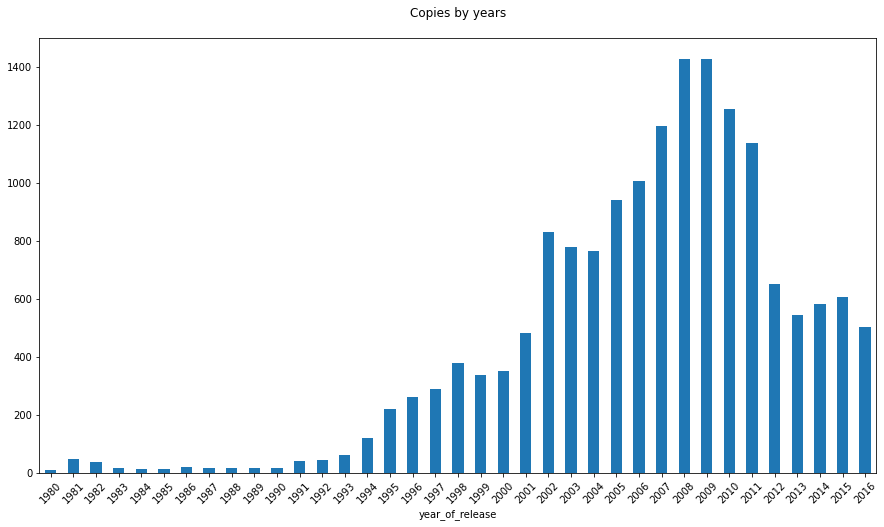

In [18]:
#lets see at the bar chart
df.query('year_of_release>0').groupby('year_of_release')['total_sales'].count().plot(kind='bar',rot=45, figsize= (15,8))
plt.title('Copies by years'+ "\n");


As we can see from the chart, the number of released games began to grow only in 1994 and gradually reached its peak in 2008 and 2009. After the crisis of these years the number of released games decreased considerably, and since 2012 the market has been relatively stable. Pre-1994 data should not be taken into account since it is unlikely that we can draw conclusions based on several games a year, it is interesting to know how the market grew and fell. Also, to make a forecast for 2017 we will look at several years prior to 2017


### Sales by top platforms

In [19]:
#grouped by platform and amount of copies sold
df_genre = df.groupby(by=['platform'])['total_sales'].sum()
df_genre = df_genre.sort_values(ascending=False)
df_genre.head(6)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
Name: total_sales, dtype: float64

We've identified the top 6 platforms with sales of over 800mn copies, these are: PS2, X360, PS3, Wii, DS, PS.
Let's take a cross-section of these platforms and see how sales change on the graph over the years.

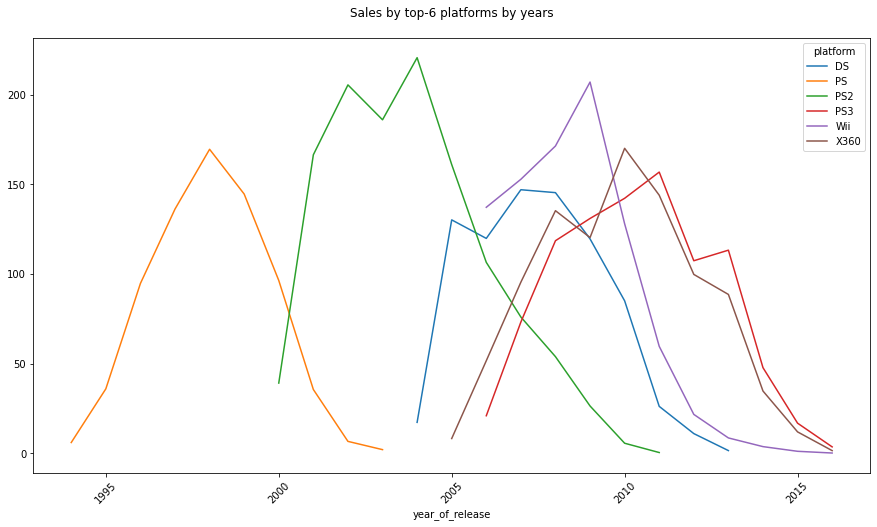

In [20]:
#lets see Sales by top-6 platforms by years
(df.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS"] and year_of_release>1990')
         .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
         .plot(kind='line',rot=45, figsize= (15,8)))
plt.title('Sales by top-6 platforms by years'+ "\n");

As we can see, we've identified the top 6 platforms with sales of over 800mln copies, these are: PS2, X360, PS3, Wii, DS, PS and we built a line graph by year. We can see that when PS sales drop, it is replaced by PS2, the same thing happened to PS3. We also see that from 2004-2006 there were big competitors to PS, but none of the platforms were as successful as PS2. Since its introduction the platform needs on average 4-5 years to reach its peak. However, the average life span is 9-12 years from the first sales.

### Which platforms lead in sales

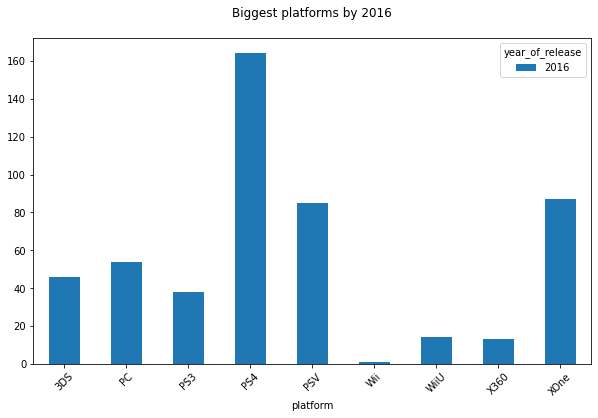

In [21]:
#let's look at a cross-section of existing platforms for 2016
df_plat_q = (df.query('year_of_release==2016')
             .pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='count')
            )
df_plat_q.plot(kind='bar', figsize = (10,6), rot=45)
plt.title('Biggest platforms by 2016'+ "\n");

In [22]:
#take a look at the current period since 2005, after which most of the platforms that still exist today have emerged
df.query('year_of_release>2004').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='count')

platform           3DS   DC     DS    GBA    GC     PC    PS2    PS3    PS4  \
year_of_release                                                               
2005               NaN  NaN  118.0  135.0  97.0   37.0  261.0    NaN    NaN   
2006               NaN  NaN  201.0   39.0  40.0   52.0  261.0   27.0    NaN   
2007               NaN  1.0  376.0    6.0   4.0   62.0  214.0   90.0    NaN   
2008               NaN  1.0  493.0    NaN   NaN   76.0  191.0  138.0    NaN   
2009               NaN  NaN  403.0    NaN   NaN  107.0   96.0  162.0    NaN   
2010               NaN  NaN  323.0    NaN   NaN   90.0   38.0  181.0    NaN   
2011             116.0  NaN  153.0    NaN   NaN  139.0    7.0  215.0    NaN   
2012              93.0  NaN   23.0    NaN   NaN   61.0    NaN  148.0    NaN   
2013              91.0  NaN    8.0    NaN   NaN   39.0    NaN  126.0   16.0   
2014              80.0  NaN    NaN    NaN   NaN   47.0    NaN  108.0   75.0   
2015              86.0  NaN    NaN    NaN   NaN   50.0    NaN   73.0  137.0   
2016              46.0  NaN    NaN    NaN   NaN   54.0    NaN   38.0  164.0   

platform           PSP    PSV    Wii  WiiU   X360     XB  XOne  
year_of_release                                                 
2005              95.0    NaN    NaN   NaN   18.0  180.0   NaN  
2006             189.0    NaN   44.0   NaN   93.0   62.0   NaN  
2007             133.0    NaN  185.0   NaN  124.0    3.0   NaN  
2008             101.0    NaN  282.0   NaN  146.0    1.0   NaN  
2009             162.0    NaN  325.0   NaN  172.0    NaN   NaN  
2010             188.0    NaN  253.0   NaN  182.0    NaN   NaN  
2011             139.0   18.0  143.0   NaN  207.0    NaN   NaN  
2012             106.0   53.0   31.0  32.0  106.0    NaN   NaN  
2013              54.0   63.0   12.0  42.0   75.0    NaN  19.0  
2014              10.0  100.0    6.0  31.0   63.0    NaN  61.0  
2015               3.0  110.0    4.0  28.0   35.0    NaN  80.0  
2016               NaN   85.0    1.0  14.0   13.0    NaN  87.0

As we can see, the absolute sales leader for 2016 is PS4, followed by XOne and 3DS. Absolutely all platforms have seen a drop in the level of copies sold. For next year's forecast I would look at 3DS,PC (which has been holding its own for years),PS4,PSV,WiiU and XOne.

###  The boxplot on global game sales by platforms

In [23]:
#lets make a query and create a table with actual data
actual_df = df.query('year_of_release>2004')

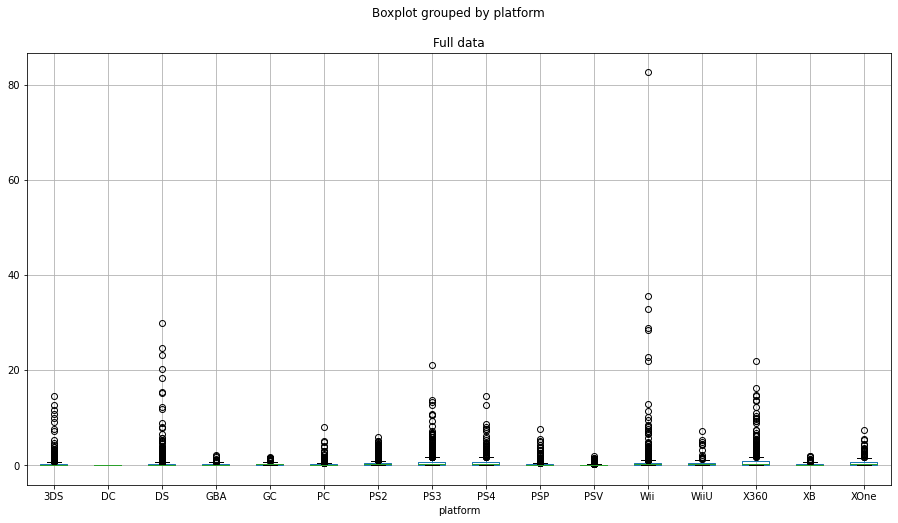

In [24]:
g= actual_df.boxplot(column='total_sales', by='platform', figsize =(15,8));
g.set(title='Full data');

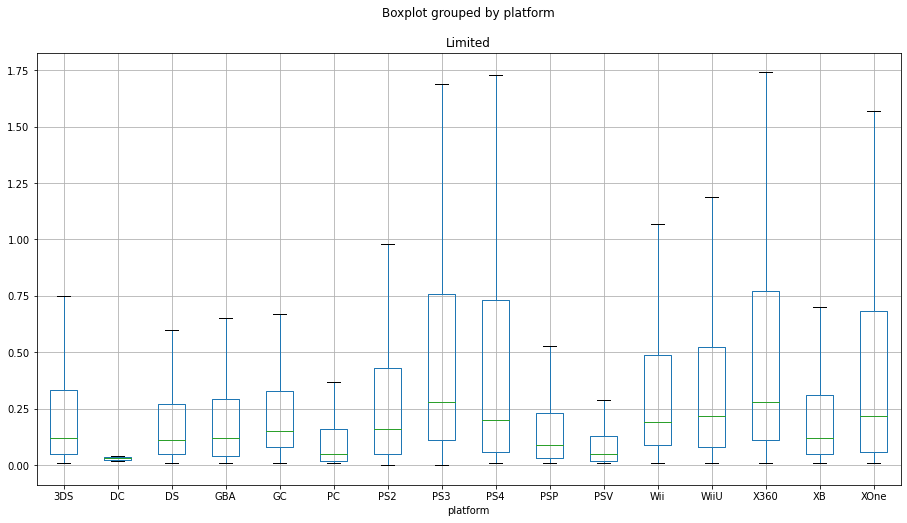

In [25]:
g= actual_df.boxplot(column='total_sales', by='platform', figsize =(15,8),showfliers=False)
g.set(title='Limited');

We selected platforms and their sales for the actual period from 2005 to 2016. 
Boxplot without outliers shows that sales on DC have remained almost unchanged over time, but PS3,PS4,X360 and Xone have changed and are changing significantly, which can be attributed to the fact that more games are released on these platforms, respectively some are becoming more and others are becoming less marketable. 
Considering the release figures, only a small number of DS,PS3,Wii and X360 games really break even and sell more than 20mln copies, while on most platforms, the median sales amount to around 400k. The absolute top seller is Wii Sports from Wii with more than 80 million copies.

### Scatter diagram and correlation using the PS3 as an example

In [26]:
#leave only the necessary columns for analysis by critics' reviews on the PS3 platform
critis_sales = actual_df[['platform','na_sales', 'eu_sales', 'jp_sales', 'other_sales','total_sales','critic_score']]

In [27]:
critis_sales_1 = critis_sales.loc[
    (critis_sales["critic_score"] > 0) &
    (critis_sales["platform"] == "PS3")
]

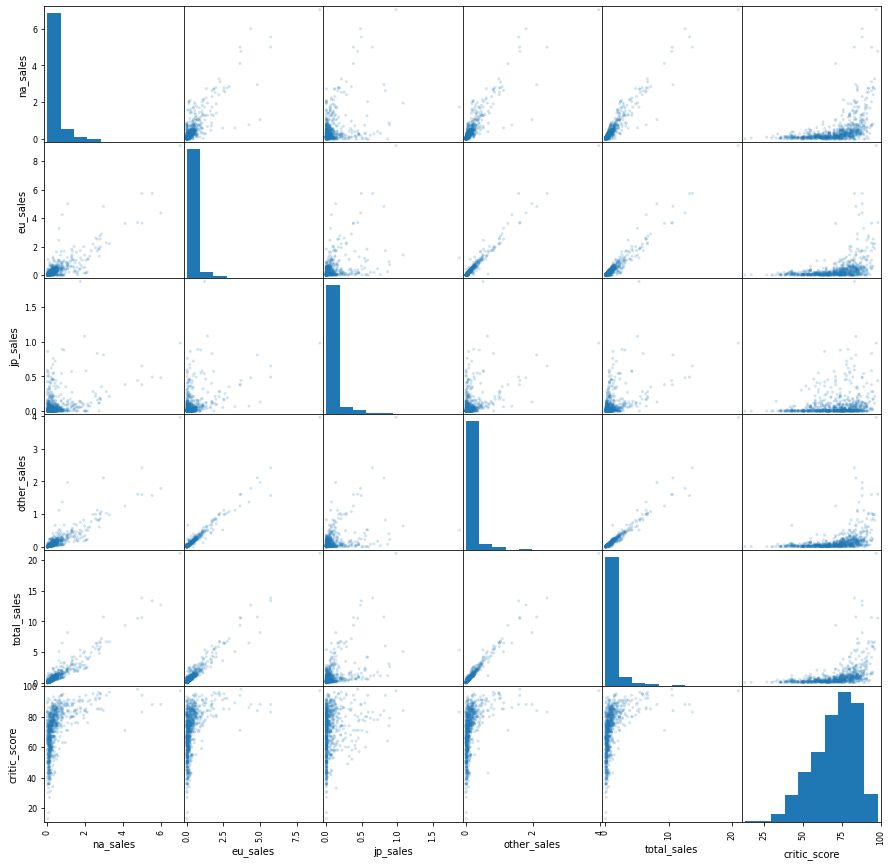

In [28]:
>>> pd.plotting.scatter_matrix(critis_sales_1, alpha=0.2,figsize=(15,15));

In [29]:
#let's see what the user reviews say
user_sales = actual_df[['platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales','total_sales','user_score']]

In [30]:
#сделаем срез
user_sales_1 = user_sales.loc[
    (user_sales["user_score"] > 0) &
    (user_sales["platform"] == "PS3") &
    (user_sales["user_score"] < 999) 
]

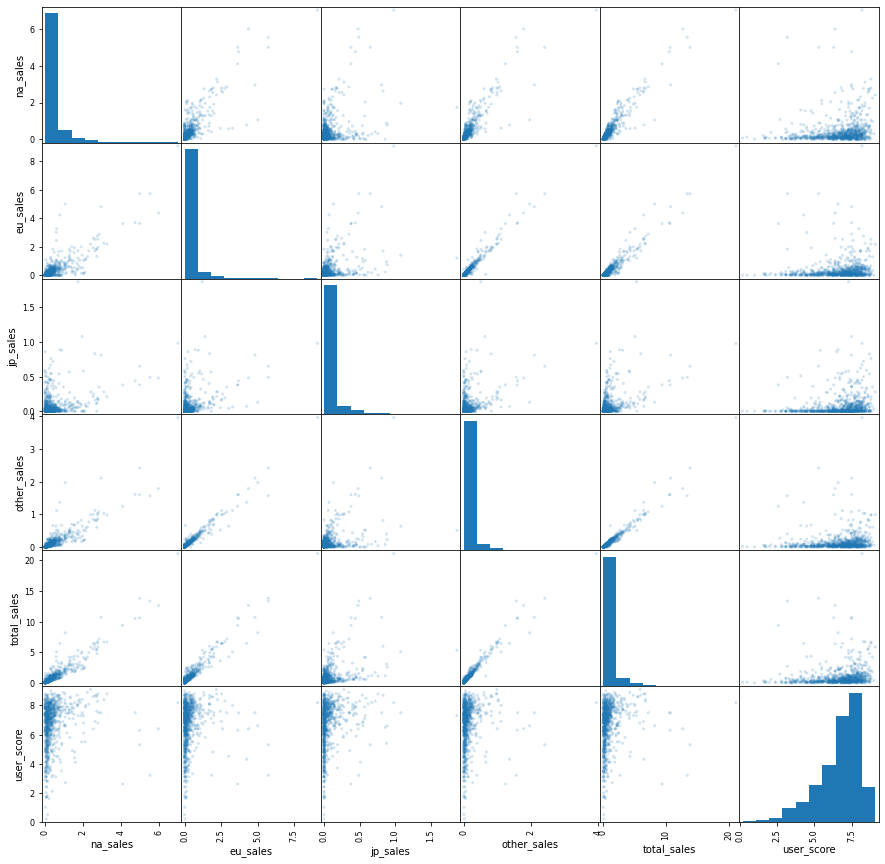

In [31]:
>>> pd.plotting.scatter_matrix(user_sales_1, alpha=0.2,figsize=(15,15));

In [32]:
#see the correlation between sales and critics' and users' reviews, using the PS3 as an example
corr1 = actual_df[['platform','na_sales', 'eu_sales', 'jp_sales', 'other_sales','total_sales','critic_score','user_score']]
corr1 = corr1.query('user_score>0 and user_score!=999 and platform =="PS3" and critic_score>0')

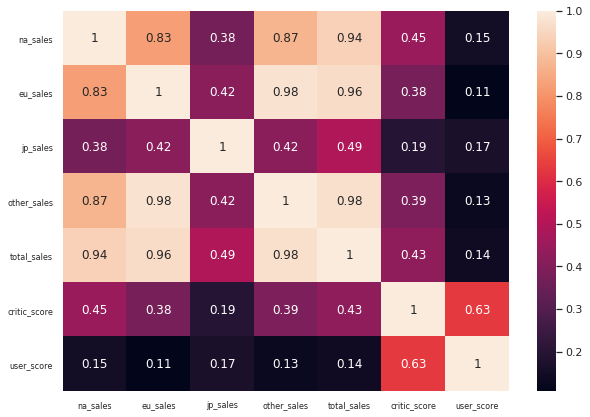

In [33]:
#cравним на heatmap по типам построек
plt.figure(figsize=(10, 7))
sns.set(font_scale=1)
sns.heatmap(corr1.corr(), annot=True)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

As we can see, in all cases the correlation is positive, which tells us that if 1 factor increases, factor 2 will also increase (and vice versa). The highest correlation is 0.45 between Critics' Rating and PS3 sales in America, while the lowest correlation is 0.19 in Japan. But the situation with user reviews is the opposite, despite the low correlation, the highest correlation between user reviews and sales is in Japan, while the lowest is in Europe.
At the same time, the correlation between game sales in Japan and the rest of the world is much lower than between other groups. This can be explained by the fact that it is a very isolated market with low dependence on sales in other regions. It is important to note that the correlation of PS3 game ratings between critics and users is quite high - 0.63

### Scatter plot and correlation on the remaining platforms

In [34]:
#now lets take a look at the other platforms
critis_sales_2 = critis_sales.query('critic_score>0 and platform != "PS3"')

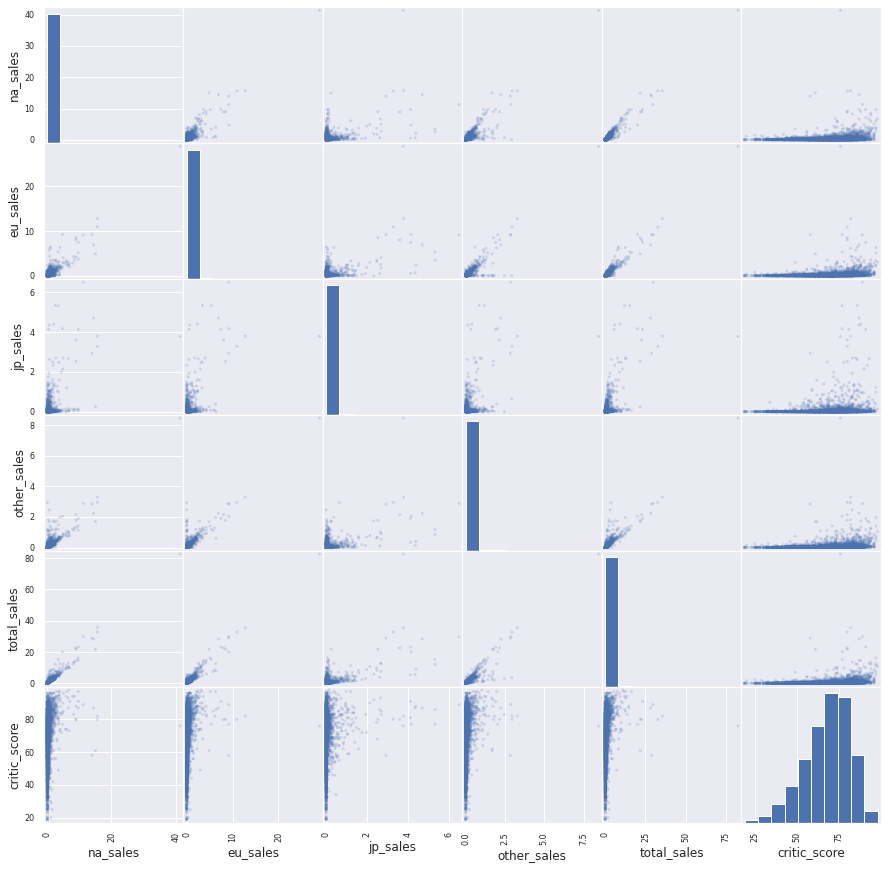

In [35]:
>>> pd.plotting.scatter_matrix(critis_sales_2, alpha=0.2,figsize=(15,15));

In [36]:
#сделаем срез по юзерам
user_sales_2 = user_sales.query('user_score>0 and user_score!=999 and platform !="PS3"')

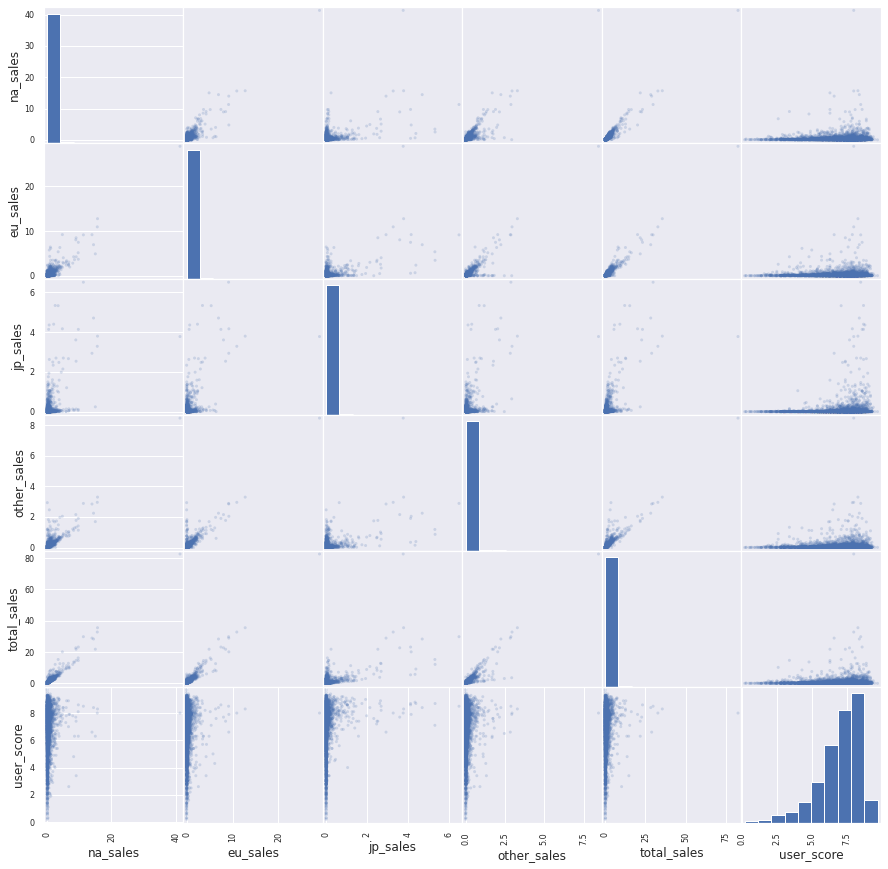

In [37]:
>>> pd.plotting.scatter_matrix(user_sales_2, alpha=0.2,figsize=(15,15));

In [38]:
#посмотрим корреляцию между продажами и отзывами критиков и юзеров всех остальных платформ
corr1 = actual_df[['platform','na_sales', 'eu_sales', 'jp_sales', 'other_sales','total_sales','critic_score','user_score']]
corr2 = corr1.query('user_score>0 and user_score!=999 and platform !="PS3" and critic_score>0')


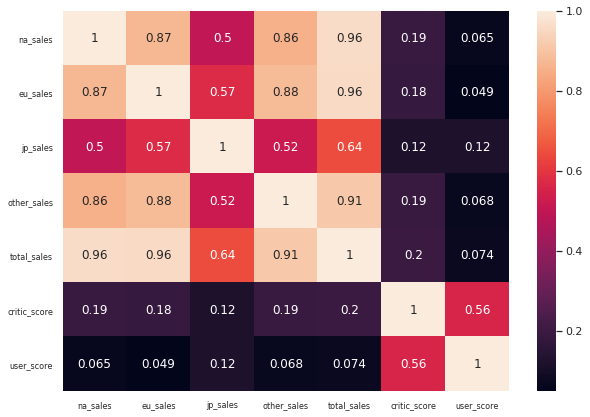

In [39]:
#cравним на heatmap по типам построек
plt.figure(figsize=(10, 7))
sns.set(font_scale=1)
sns.heatmap(corr2.corr(), annot=True)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

The situation is slightly different here, because of the presence of Japanese platforms and games, the correlation of the Japanese sector has increased in relation to almost all other parameters. But the values for the regions fell. In this case, the correlation between the Critics' Ratings and the Users' Ratings dropped slightly for the overall mass, but nevertheless stands at 0.56. 
The situation with the correlation between ratings and regions remained the same, with the highest correlation of the critical rating remaining for the Americas, and the lowest correlation of users for Europe.

### Breakdown of games by genres

In [40]:
#lets see the amount of sales by genre
comp_genre = actual_df[['genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
comp_map = comp_genre.groupby(by=['genre']).sum()
comp_map

na_sales  eu_sales  jp_sales  other_sales
genre                                                  
Action          580.10    372.83    108.39       141.07
Adventure        66.57     39.93     30.27        13.04
Fighting        106.20     48.11     31.68        25.08
Misc            311.82    167.09     72.49        64.43
Platform        149.75     86.93     36.32        30.06
Puzzle           49.03     33.81     18.64         8.80
Racing          163.58    129.09     17.61        44.84
Role-Playing    211.85    115.52    179.60        43.81
Shooter         400.96    248.07     20.67        88.86
Simulation      126.95     86.02     32.33        24.32
Sports          433.03    266.10     52.77       102.74
Strategy         30.94     25.41     15.11         6.96

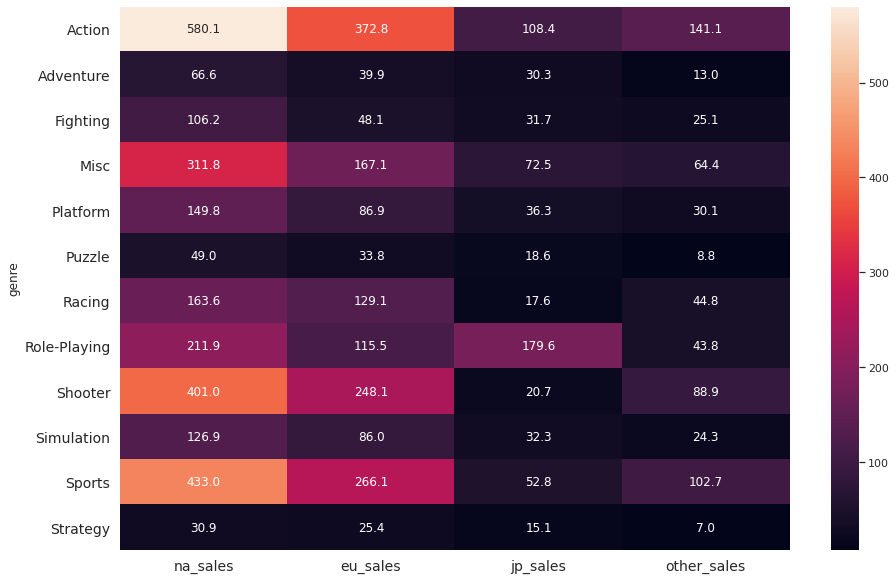

In [41]:
#сравним на heatmap
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Action, Shooter and Sport are the most profitable genres in all regions except Japan, with Role-Playing being the absolute leader in Japan, followed by Action, Platform and Sports. Strategy, Puzzle and Adventure are the most unselling genres in Japan and other regions.
The largest number of games sold is in the Americas, as a proportion of the number of games sold in other regions.


## Step 3.  User portrait of each region

### Top platforms by region

In [42]:
#Let's start with na portrait and look at the top 5 platforms for america
piepl_na =actual_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

In [43]:
#see the eu portrait and look at the top 5 platforms for europe
piepl_eu =actual_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

In [44]:
#see the jp portrait and look at the top 5 platforms for japan
piepl_jp = actual_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

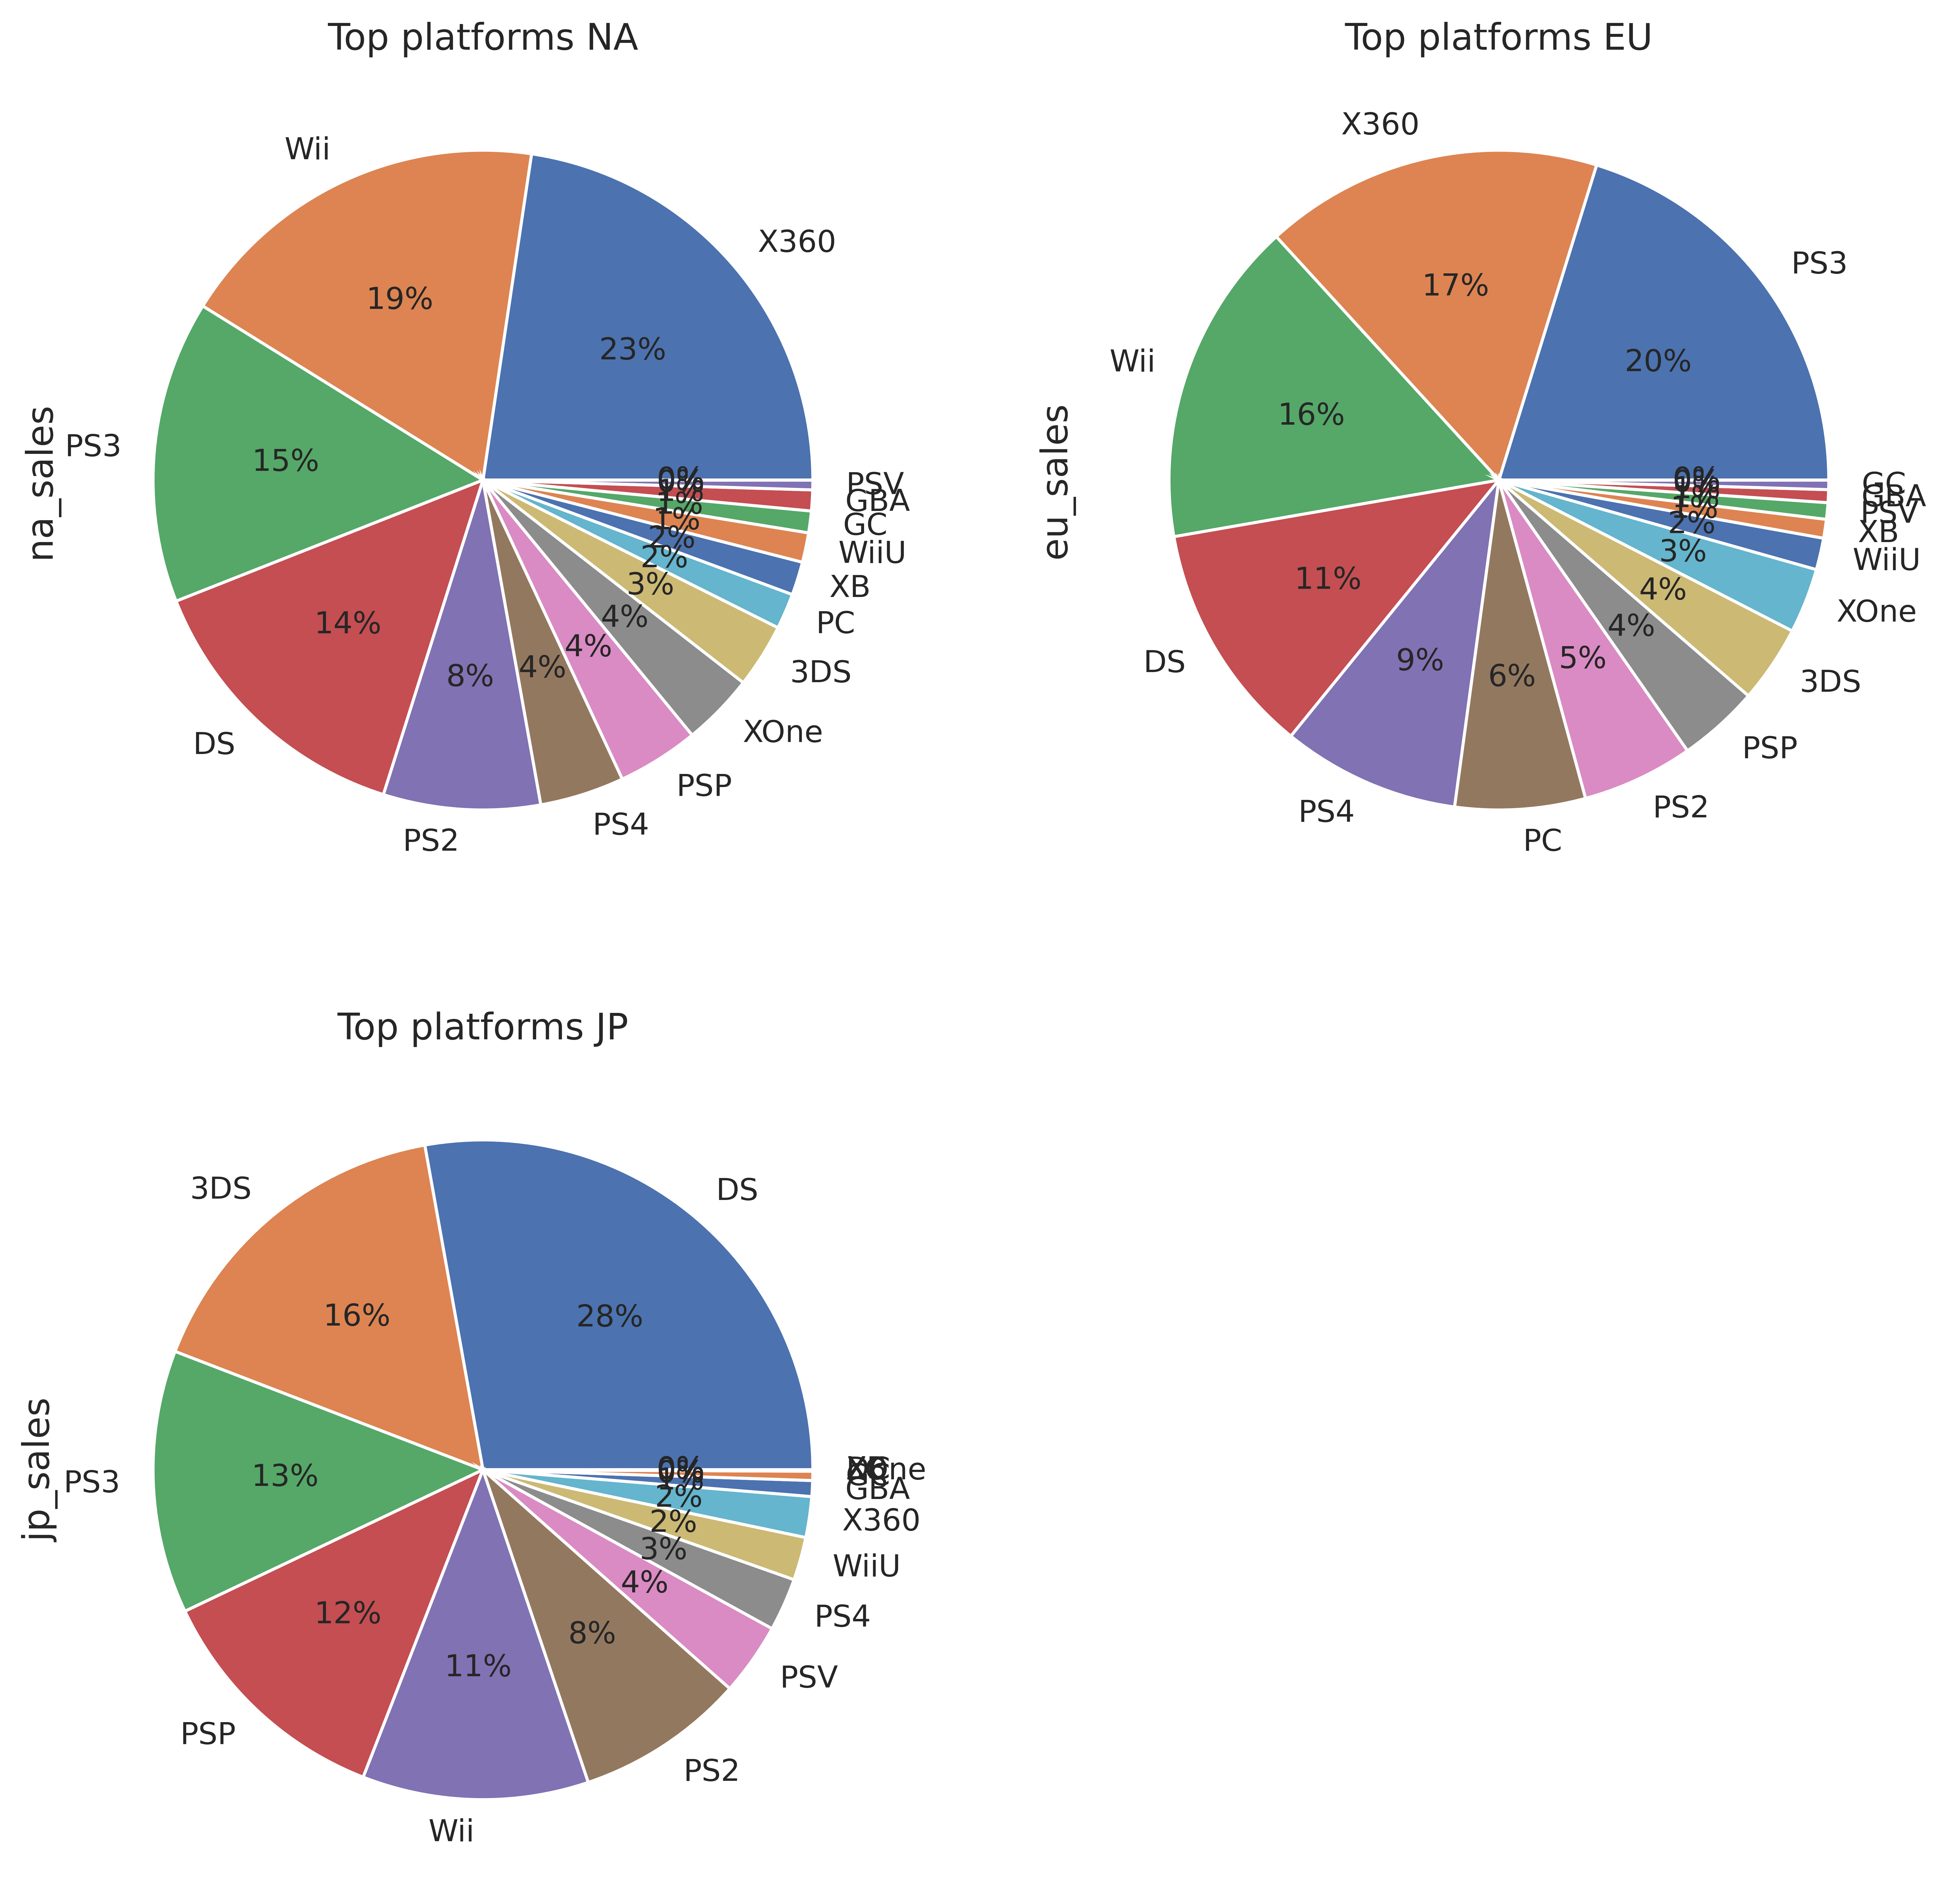

In [45]:
#see at pie chart
fig = plt.figure(figsize=(11,11), dpi=800)

#2 rows 2 columns

#first row, first column
ax1 = plt.subplot2grid((2,2),(0,0))
piepl_na.plot.pie(y='platform',autopct='%.0f%%',
                                          textprops={'size': 'smaller'})
plt.title('Top platforms NA')

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
piepl_eu.plot.pie(y='platform', autopct='%.0f%%',
                                          textprops={'size': 'smaller'})
plt.title('Top platforms EU')

#Second row first column
ax1 = plt.subplot2grid((2,2), (1,0))
piepl_jp.plot.pie(y='platform',autopct='%.0f%%',
                                          textprops={'size': 'smaller'})
plt.title('Top platforms JP')

plt.show()


As you can see, the **top 5 platforms in America** are the X360,Wii,PS3,DS and PS2 with a combined sales share of 78%.

**Europe's top 5 platforms** - PS3,X360,Wii,DS and PS4 with a combined share of almost 73%

**Japan's top 5 platforms** - DS,3DS,PS3,PSP and Wii with a combined share of 80%!

### Top genres by region

In [46]:
#let's see the top 5 genres for na
genre_na = actual_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

In [47]:
#let's see the top 5 genres for eu
genre_eu = actual_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

In [48]:
#let's see the top 5 genres for japan
genre_jp =actual_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

In [49]:
#lets see at pie chart
fig = plt.figure(figsize=(11,11), dpi=800)
#2 rows 2 columns

#first row, first column
ax1 = plt.subplot2grid((2,2),(0,0))
genre_na.plot.pie(y='genre',autopct='%.0f%%',
                                          textprops={'size': 'smaller'})
plt.title('Top genres NA')

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
genre_eu.plot.pie(y='genre', autopct='%.0f%%',
                                          textprops={'size': 'smaller'})
plt.title('Top genres EU')

#Second row first column
ax1 = plt.subplot2grid((2,2), (1,0))
genre_jp.plot.pie(y='genre',autopct='%.0f%%',
                                          textprops={'size': 'smaller'})
plt.title('Top genres JP')

plt.show()

**The top five genres in America** are Action, Sports, Shooter,MIsc and Role-playing with a 73.8% share of the total pool

**The top five genres in Europe** are Action, Sports, Shooter, MIsc and Racing, with a 73% share of the total pool

**The top five genres in Japan** are Role-playing, Action,MIsc, Sports, and Platform with a 73.1% share of the total pool

As we can see, the European and American markets are very similar in terms of game genres, but players in Japan prefer other genres.

###  Impact of ESRB rating

In [50]:
#lets see if the ESRB rating has an impact on sales by constructing a summary table
rating_pivot = actual_df.pivot_table(index='rating', values = ['na_sales','eu_sales','jp_sales','other_sales'],aggfunc = 'sum')
rating_pivot

eu_sales  jp_sales  na_sales  other_sales
rating                                           
AO          0.61      0.00      1.26         0.09
E         651.82    259.18   1023.26       222.17
E10+      181.92     39.05    343.03        71.37
EC          0.11      0.00      1.53         0.11
M         437.13     49.65    638.02       155.23
RP          0.03      0.00      0.00         0.01
T         347.29    268.00    623.68       145.03

In [51]:
#lets see the distribution by genre and rating
rating_pivot = actual_df.pivot_table(index='rating', columns ='genre', values = 'total_sales' ,aggfunc = 'count')
rating_pivot

genre   Action  Adventure  Fighting   Misc  Platform  Puzzle  Racing  \
rating                                                                 
AO         1.0        NaN       NaN    NaN       NaN     NaN     NaN   
E        271.0      838.0       NaN  984.0     254.0   348.0   455.0   
E10+     465.0       66.0      19.0  164.0     140.0    42.0    95.0   
EC         1.0        2.0       NaN    5.0       NaN     NaN     NaN   
M        491.0       74.0      27.0    8.0       2.0     NaN    15.0   
RP         NaN        NaN       NaN    NaN       NaN     NaN     NaN   
T       1346.0       85.0     411.0  207.0      27.0     9.0    75.0   

genre   Role-Playing  Shooter  Simulation  Sports  Strategy  
rating                                                       
AO               NaN      NaN         NaN     NaN       NaN  
E               39.0     24.0       470.0  1144.0      36.0  
E10+           107.0     56.0        46.0   105.0      75.0  
EC               NaN      NaN         NaN     NaN       NaN  
M              144.0    551.0         4.0     7.0      22.0  
RP               NaN      NaN         NaN     NaN       1.0  
T              777.0    202.0       124.0   133.0     288.0

As we can see, the majority of games in almost all regions fall into the Everyone category, in fact, they are universal games for all ages, which explains the highest sales. Japan alone has the best selling titles for teenagers, and games for 17+ adults are in second place in all regions except Japan. Everyone10+ - for all users over the age of 10 - can also be included in the category of potentially profitable games.
The second table shows the distribution by genre and the number of released games in each category.

<a id='hch'></a>
## Step 4. Hypothesis testing

<a id='tt1'></a>
### Two-way ttest of first hypothesis: Average user score for Xbox One and PC platforms are the same

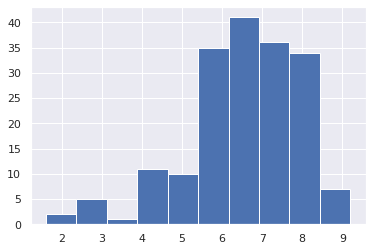

In [52]:
# make a query fo Xbox One and PC
xbox = actual_df.query('platform=="XOne" and 999>user_score>0')
pc = actual_df.query('platform=="PC" and 999>user_score>0')
xbox['user_score'].hist();

In [53]:
xbox['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

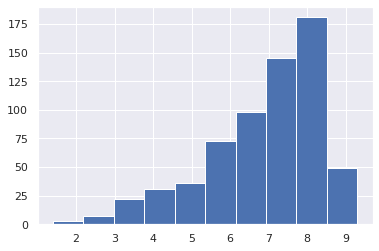

In [54]:
pc['user_score'].hist();

<p>Lets implement the null and the alternative hypothesis :</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Average user ratings for Xbox One and PC platforms are the same}\\
   H_1 :\text{Average user ratings for Xbox One and PC platforms are not the same}
 \end{cases}
\end{equation*}$

Level of significance: $\alpha = 0.05$

Let's calculate the p-value using ttest from the scipy library to compare the means of the two samples.

If the p-value is less than the chosen significance level $\alpha = 0.05$, we will reject the null hypothesis of equality of means. Otherwise, we conclude that the data did not allow us to reject the null hypothesis.

In [55]:
from scipy import stats as st
alpha = .05 

xbox_h = xbox['user_score']
pc_h = pc['user_score']

results = st.ttest_ind(
    xbox_h, 
    pc_h,  equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Couldn't reject the null hypothesis") 

p-value:  0.002188238110556073
Rejecting the null hypothesis


<a id='my1'></a>
### Mann-Whitney non-parametric test for 1st hypothesis : Average user ratings for Xbox One and PC platforms are the same

We test using the Mann-Whitney test, since the distribution of the random variables in our datasets differs from the normal distribution

In [56]:
results = st.mannwhitneyu(xbox['user_score'], pc['user_score'], alternative='two-sided')
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Couldn't reject the null hypothesis")

p-value:  5.4876603043564474e-05
Reject the null hypothesis


As we can see, the Mann-Whitney test and the ttest lead to the same conclusion, the probability of error in rejecting the null hypothesis is < 0.05, so we have grounds to reject the null hypothesis and accept the alternative hypothesis

<a id='tt2'></a>
###  Two-way ttest for second hypothesis: Average user ratings for Action and Sports genres are equal

In [58]:
#lets make the query for Action and Sports
action = actual_df.query('genre=="Action" and 999>user_score>0')
sports = actual_df.query('genre=="Sports" and 999>user_score>0')

<p>Lets implement the null and the alternative hypothesis :</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Average user ratings for Action and Sports genres are the same}\\
   H_1 :\text{Average user ratings for Action and Sports genres are not the same}
 \end{cases}
\end{equation*}$

Level of significance: $\alpha = 0.05$

Let's calculate the p-value using ttest from the scipy library to compare the means of the two samples.

If the p-value is less than the chosen significance level $\alpha = 0.05$, we will reject the null hypothesis of equality of means. Otherwise, we conclude that the data did not allow us to reject the null hypothesis.


In [59]:
action_h = action['user_score']
sports_h = sports['user_score']

results = st.ttest_ind(
    action_h, 
    sports_h,  equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Couldn't reject the null hypothesis") 

p-value:  8.343348749913049e-09
Reject the null hypothesis


<a id='my2'></a>
### Mann-Whitney non-parametric test for second hypotheses : Average user ratings of Action and Sports genres are equal

In [60]:
results = st.mannwhitneyu(action['user_score'], sports['user_score'], alternative='two-sided')
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Couldn't reject the null hypothesis")

p-value:  1.3029998518581962e-07
Reject the null hypothesis


As in the first test, so here, we have a probability of making an error of 1.3029998518581962e-07 (and 8.343348749913049e-09), which is much smaller than the given critical value, so the probability of making a type 1 error is very small, so we have grounds to reject the 0 hypothesis and accept the alternative.

<a id='conc'></a>
# Conclusions 

1. After examining the data by market and category, it can be concluded that when planning a company for sales in different markets, the specifics of the region must also be taken into account.
2. Where to look? The first thing to look at is the overall decline in sales, before that an exponential growth with a peak in 2009 with the most popular platforms PS2, X360, PS3, Wii, DS, PS
3. In 2016, the 3DS,PS4,PSV,WiiU, XOne and PC are worth looking out for, with the PS4 platform being the absolute sales leader. But it's worth remembering that from the very first PS during the drop in sales, the PS2,PS3 and our PS4 have taken over. This means that a PS5 could be coming soon. It's worth remembering that it takes an average of 4-5 years for a platform to reach its peak since its introduction. That said, the average lifespan is 9-12 years from the first sales.
4. The correlation between sales and ratings of critics (and users) is not high at all, which means that we cannot rely solely on reviews when planning or estimating sales. The highest correlation between rating of critics and sales is in America, while the lowest is in Japan. However, the user ratings are even lower in Japan, which means that the users here are more guided by the ratings of other users.
5. In terms of platforms, the markets in Europe and America are very similar, except that in America the PS2 is still more popular and in Europe the PS4. The most popular platform in Japan is DS and 3DS (in second place).
6. The most lucrative genres are Action, Shooter, and Sport in all regions except Japan, with Role-Playing being the absolute leader in Japan, followed by Action, Platform, and Sports. Strategy, Puzzle and Adventure are the least selling genres in Japan and the rest of the regions.
7. Most games in almost all regions fall into the Everyone category. Only in Japan are the best-selling teenage games. In second place in popularity in all regions except Japan are games for adults 17+. Everyone10+ - for all users 

